<a href="https://colab.research.google.com/github/Herdvair/Pemodelan-Prediksi-Churn/blob/main/Pemodelan_Prediksi_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Poin-poin Assignment
0. Import Dataset pilih salah satu :
- https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
- https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
- https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
1. Jawablah poin-poin assignment yang tertera

# Import Library

In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

# Load Data

In [ ]:
raw_data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [ ]:
raw_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Understanding

In [ ]:
def data_understanding(raw_data : object) -> object:
    print('\n ===== Shape =====')
    print(raw_data.shape)

    print('\n ===== Info =====')
    raw_data.info()

    print('\n ===== Describe =====')
    print(raw_data.describe())

    print('\n ===== Missing Value =====')
    print(raw_data.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(raw_data.drop_duplicates())/len(raw_data))

In [ ]:
data_understanding(raw_data)


 ===== Shape =====
(10000, 12)

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB

 ===== Describe =====
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e

In [ ]:
# cek data tidak konsisten
for i in raw_data.columns:
    print(f'===== {i} =====')
    print(raw_data[i].value_counts())

Streaming output truncated to the last 5000 lines.
143538.51    1
77677.14     1
183717.94    1
93112.20     1
28690.90     1
85891.02     1
42050.24     1
110142.34    1
179269.79    1
90558.24     1
162022.47    1
66926.83     1
108891.30    1
92180.62     1
92708.10     1
26542.17     1
65010.74     1
106892.91    1
185210.63    1
4035.46      1
177805.44    1
68831.72     1
114732.62    1
101139.30    1
197283.20    1
179485.96    1
17699.48     1
118490.80    1
133292.94    1
58170.24     1
107137.30    1
145071.33    1
85495.24     1
22299.27     1
33828.64     1
128875.86    1
194700.81    1
158974.45    1
198182.73    1
141404.07    1
4175.68      1
126876.47    1
71811.90     1
105760.01    1
27937.12     1
79355.87     1
102180.27    1
95719.73     1
57121.51     1
162478.11    1
194808.51    1
124045.65    1
41052.82     1
92223.59     1
78065.90     1
59679.90     1
85000.32     1
159808.95    1
129001.30    1
113557.70    1
147758.51    1
28865.59     1
51113.14     1
1000

In [ ]:
num_col = raw_data.select_dtypes(include=['int64','float64']).columns

def check_plot(raw_data):

    for i in num_col:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(raw_data[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=raw_data[i])
        plt.title('Boxplot')

        plt.show()

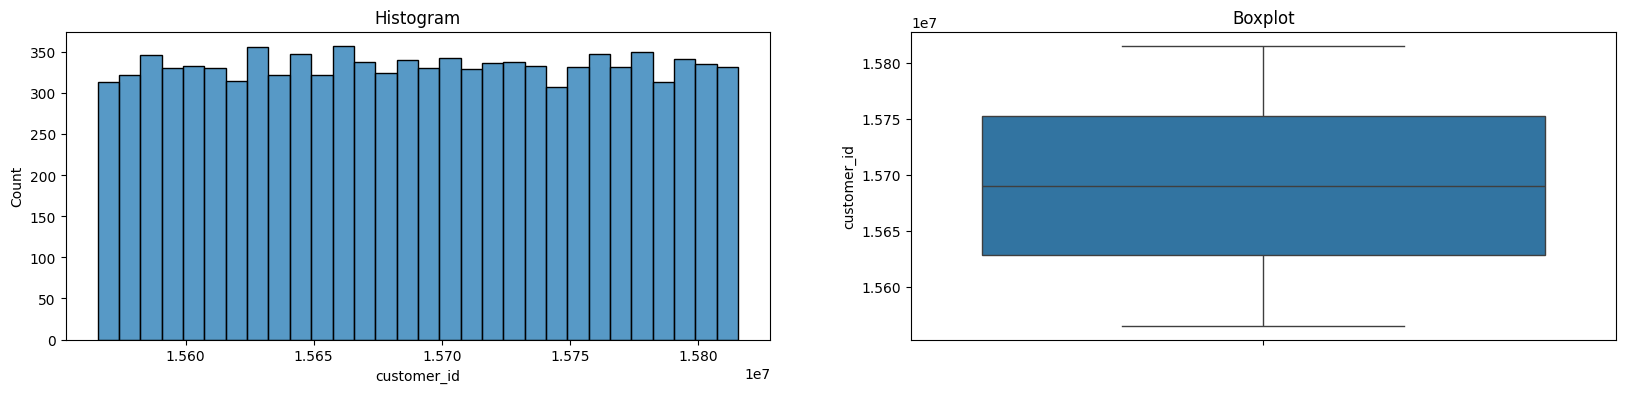

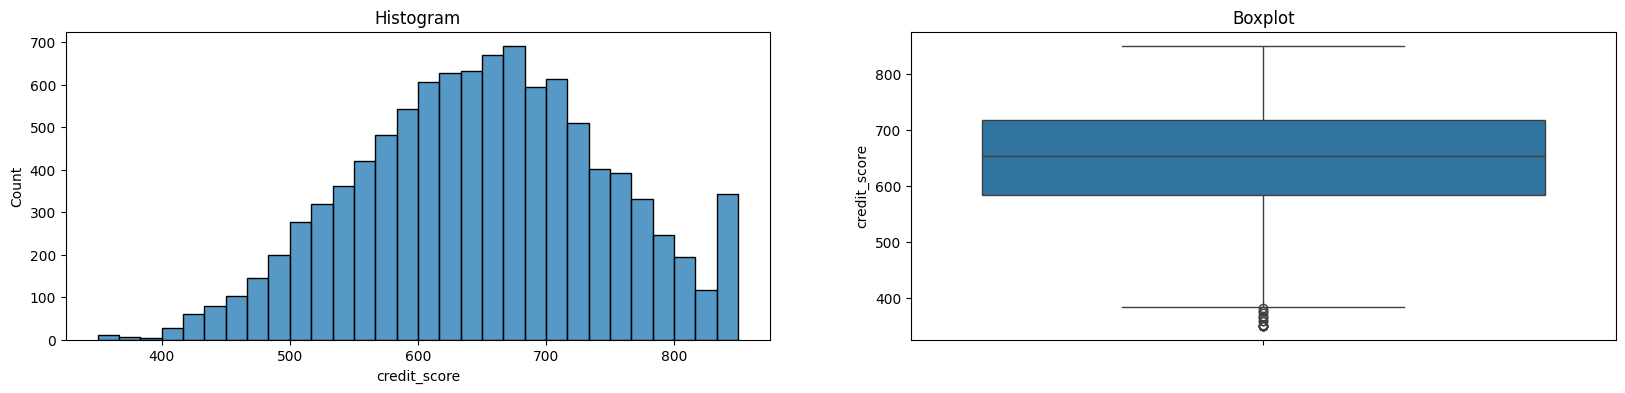

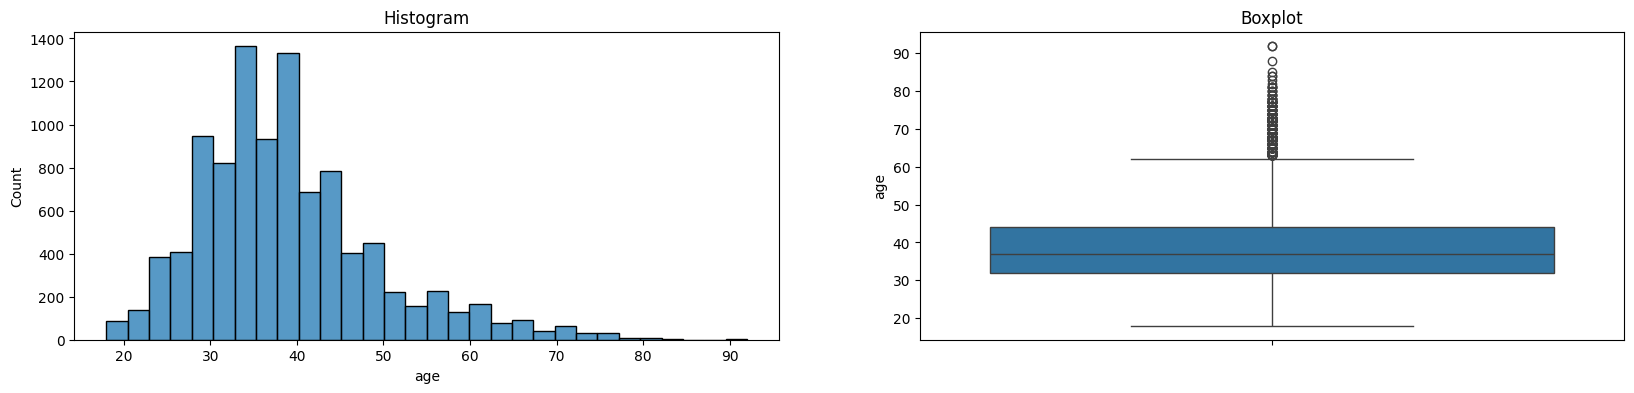

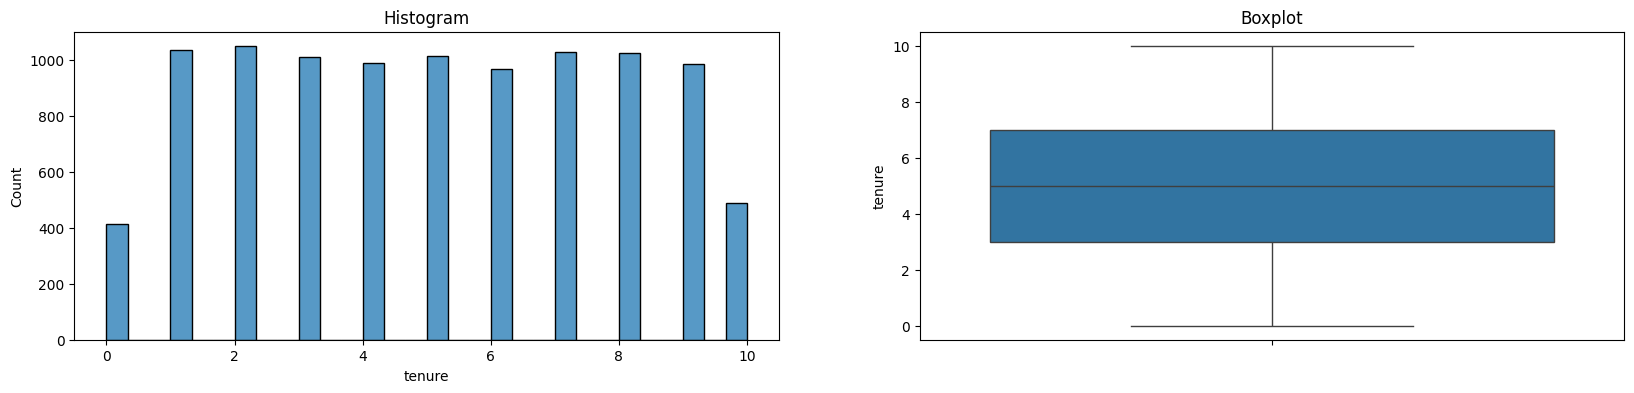

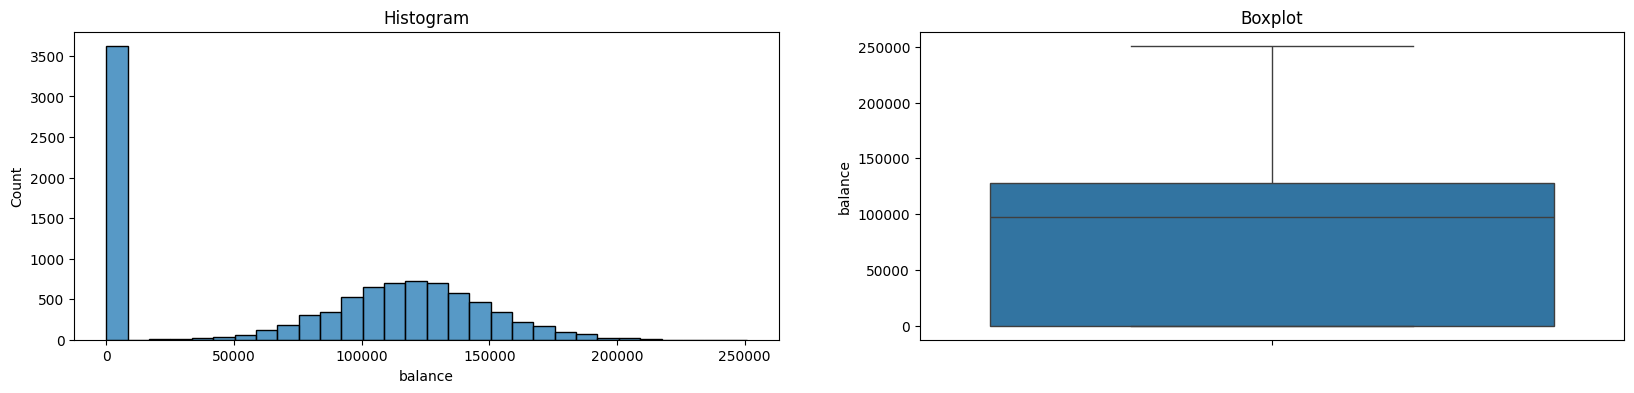

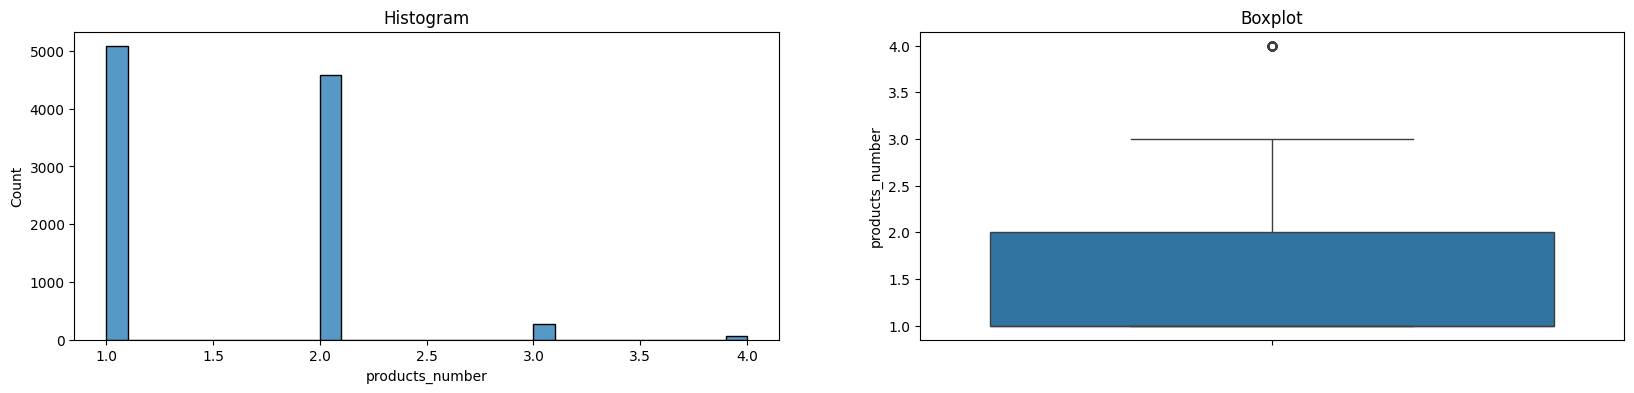

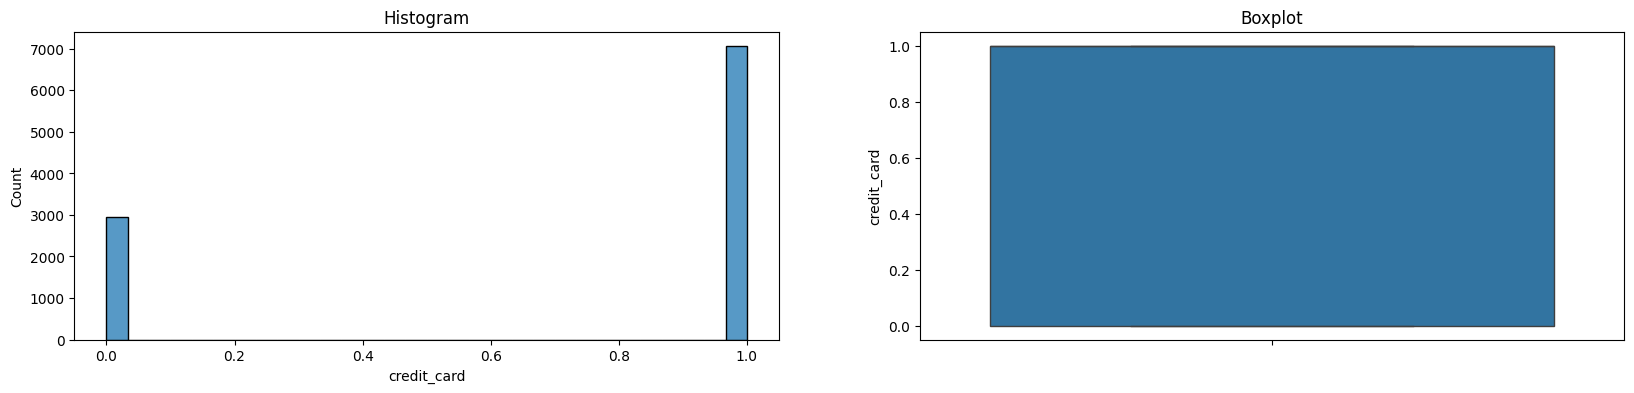

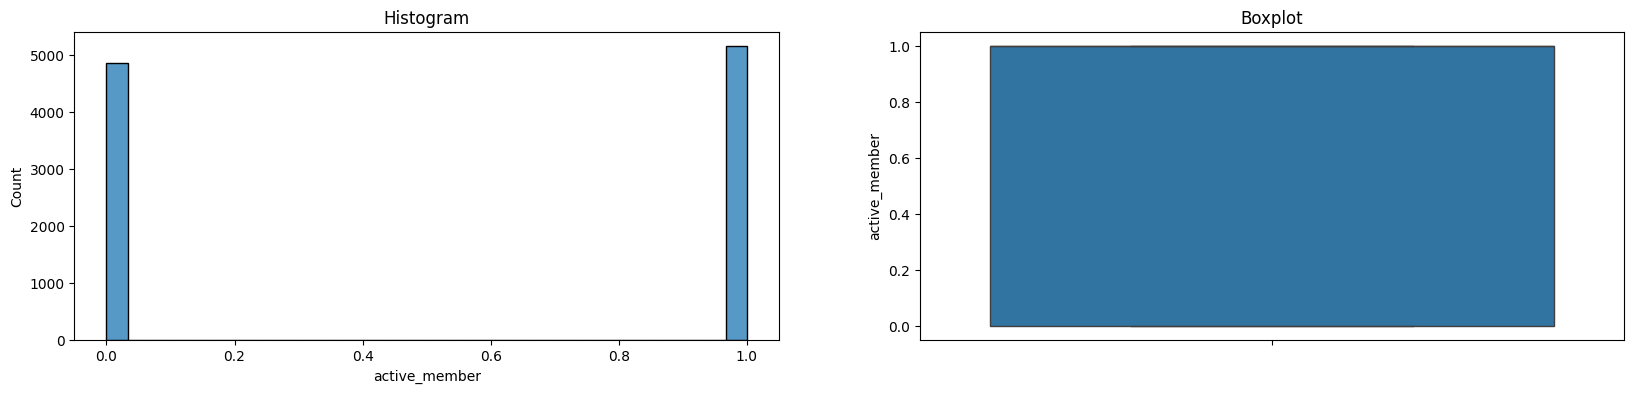

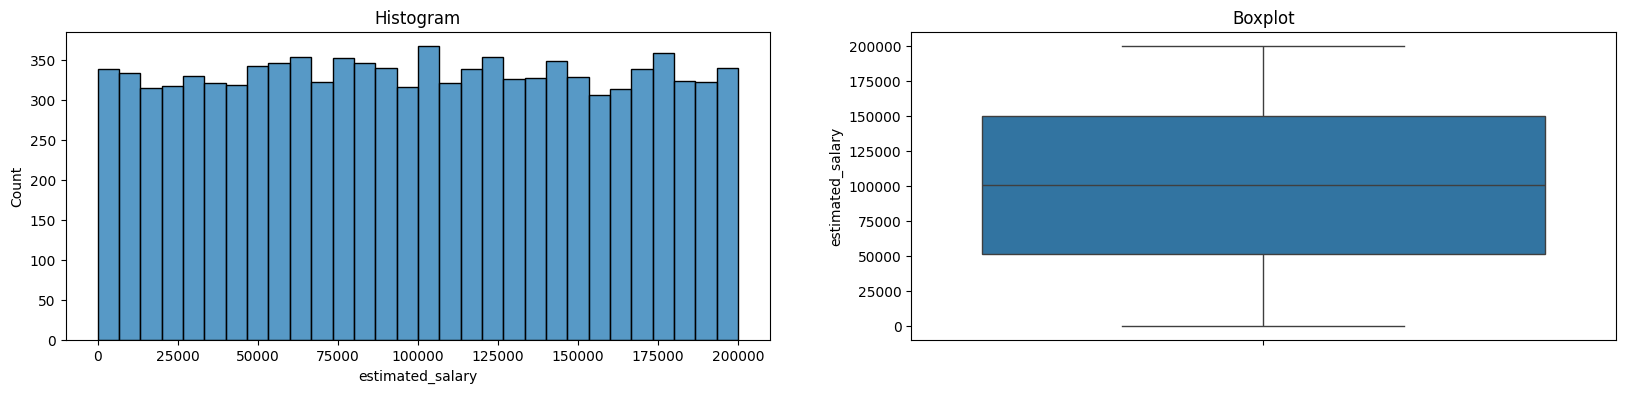

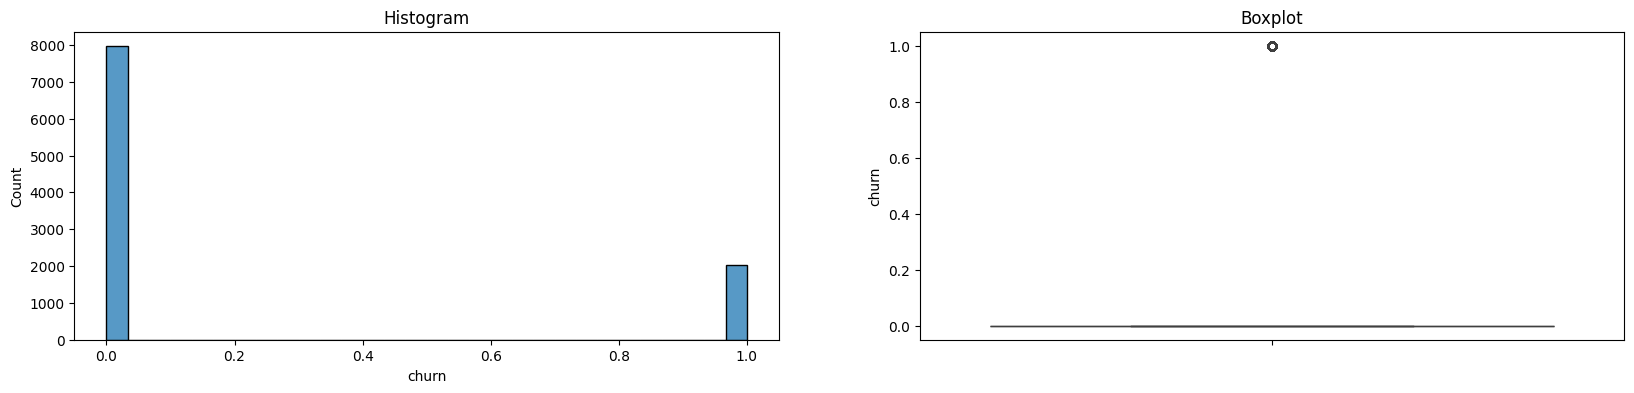

In [ ]:
check_plot(raw_data)

Dataset Overview :

1. Dataset ini memiliki 10000 baris data dan 12 kolom
2. Tidak memiliki missing value dan data duplikat
3. Memiliki 3 tipe data, yaitu object, integer, dan float
4. Tidak perlu dilakukan handling outlier karena masih dalam batas wajar semua.

#EDA


## Exploratory Data Analysis
- Lakukan analisa pada EDA menggunakan visualisasi di tiap variabel :
1. Kategorikal vs Churn Label
2. Numerik vs Churn Label
3. Anda wajib menuliskan insight, sebagai langkah untuk pencegahan churn dalam strategi marketing

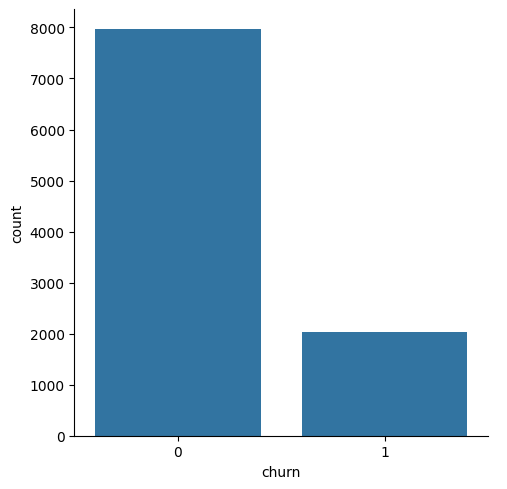

In [ ]:
sns.catplot(x = "churn", kind = "count", data = raw_data)

In [ ]:
raw_data['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [ ]:
raw_data['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


Insight :

Berdasarkan visualisasi distribusi churn dan hasil perhitungan proporsi, terlihat bahwa mayoritas nasabah berada pada kategori tidak churn dengan jumlah sekitar 7.963 nasabah atau 79,6% dari total populasi. Sementara itu, nasabah yang masuk kategori churn berjumlah 2.037 atau sekitar 20,37%. Hasil identifikasi ini menunjukkan bahwa jumlah nasabah yang bertahan jauh lebih besar dibandingkan dengan mereka yang keluar.

## Kategorikal vs Churn

In [ ]:
raw_data.select_dtypes(include=['object']).columns

Index(['country', 'gender'], dtype='object')

In [ ]:
# Variabel x (kecuali churn yg isinya bisa numerik atau kategorikal)
# variabel y (churn)
def proportional_aggregation(raw_data, x, y):
    temp_df = raw_data.groupby([x, y]).size().reset_index(name='count')
    temp_df['proportional'] = temp_df['count'] / temp_df.groupby(y)['count'].transform('sum')
    return temp_df

In [ ]:
temp_raw = raw_data.groupby(['gender','churn']).size().reset_index(name='count')
temp_raw

,gender,churn,count
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


In [ ]:
proportional_aggregation(raw_data, "gender", "churn")

,gender,churn,count,proportional
0,Female,0,3404,0.427477
1,Female,1,1139,0.559156
2,Male,0,4559,0.572523
3,Male,1,898,0.440844


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


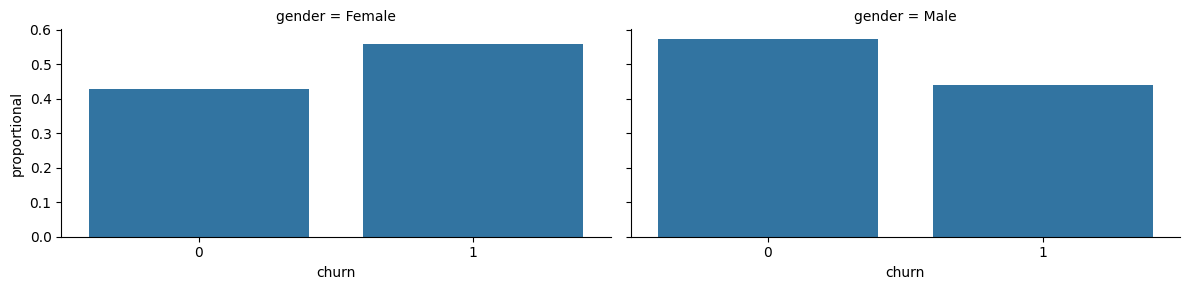

In [ ]:
g = sns.FacetGrid(
    data = proportional_aggregation(raw_data, "gender", "churn"), #pilih kolom yang ingin dihitung dan disimpan didalam variabel data
    col = "gender", #Pilih kolom yang ingin dianalisa
    aspect = 2
    #Nilai 2 mengindikasikan bahwa subplot akan memiliki lebar yang dua kali lebih besar dari tingginya.
)
g.map(sns.barplot, "churn", "proportional");
#mengisi data kedalam grid

Insight :

Berdasarkan visualisasi churn berdasarkan gender, terlihat bahwa nasabah perempuan memiliki proporsi churn lebih tinggi dibandingkan nasabah laki-laki, sedangkan laki-laki cenderung lebih banyak bertahan. Hasil identifikasi ini memberikan referensi terhadap strategi marketing dalam pencegahan churn itu sebaiknya lebih fokus ke segmen perempuan, misalnya melalui program loyalitas secara personal, penawaran eksklusif yang sesuai dengan preferensi mereka, komunikasi yang lebih proaktif melalui platform digital atau layanan pelanggan.Untuk nasabah laki-laki, perusahaan dapat mengupayakan retensi dengan skala yang lebih efisien karena segmen ini lebih stabil dalam mempertahankan layanan.

In [ ]:
proportional_aggregation(raw_data, "country", "churn")

,country,churn,count,proportional
0,France,0,4204,0.527942
1,France,1,810,0.397644
2,Germany,0,1695,0.212859
3,Germany,1,814,0.399607
4,Spain,0,2064,0.259199
5,Spain,1,413,0.202749


In [ ]:
temp_raw = raw_data.groupby(['country','churn']).size().reset_index(name='count')
temp_raw

,country,churn,count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


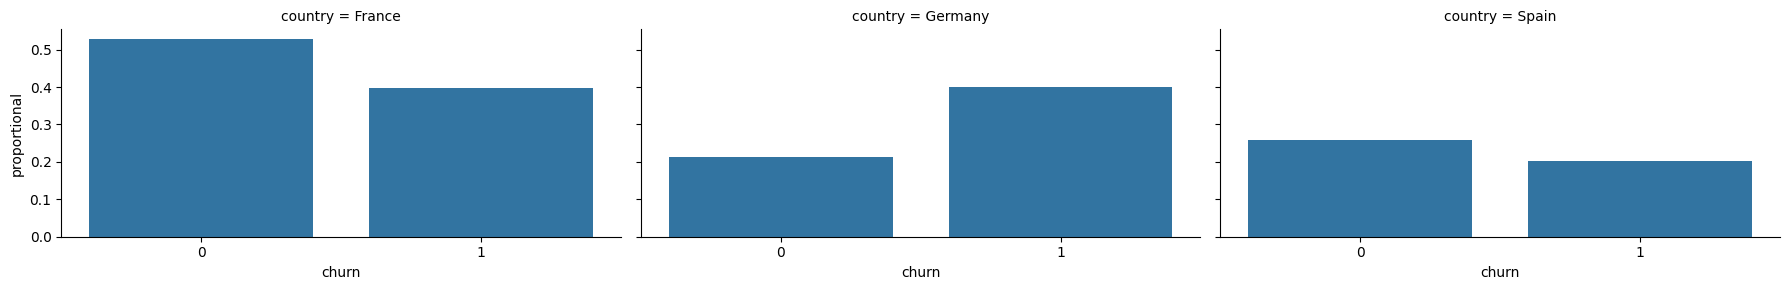

In [ ]:
g = sns.FacetGrid(
    data = proportional_aggregation(raw_data, "country", "churn"), #pilih kolom yang ingin dihitung dan disimpan didalam variabel data
    col = "country", #Pilih kolom yang ingin dianalisa
    aspect = 2
    #Nilai 2 mengindikasikan bahwa subplot akan memiliki lebar yang dua kali lebih besar dari tingginya.
)
g.map(sns.barplot, "churn", "proportional");
#mengisi data kedalam grid

Insight :

Berdasarkan visualisasi churn berdasarkan negara, terdapat pola perilaku nasabah di tiap negara. Nasabah di Germany menunjukkan tingkat churn lebih tinggi dibandingkan dengan negara France dan Spain, sehingga strategi pencegahan churn perlu difokuskan pada segmen Germany melalui pendekatan retensi yang lebih agresif, seperti program loyalitas premium, personalisasi penawaran, atau peningkatan kualitas layanan yang relevan dengan kebutuhan lokal. Sementara itu di France, walau churn tetap ada namun proporsi pelanggan bertahan (Tidak churn) cenderung lebih banyak, sehingga strategi retensi dapat difokuskan dalam menjaga kepuasan nasabah yang sudah loyal. Disisi lain yaitu Spain,, churn lebih rendah dibandingkan Germany namun tetap perlu dipantau agar tidak meningkat, misal kampanye retensi ringan seperti komunikasi proaktif, edukasi produk atau layanan dan program insentif sederhana.

## Numerical vc Churn

In [ ]:
raw_data.select_dtypes(include=['number']).columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

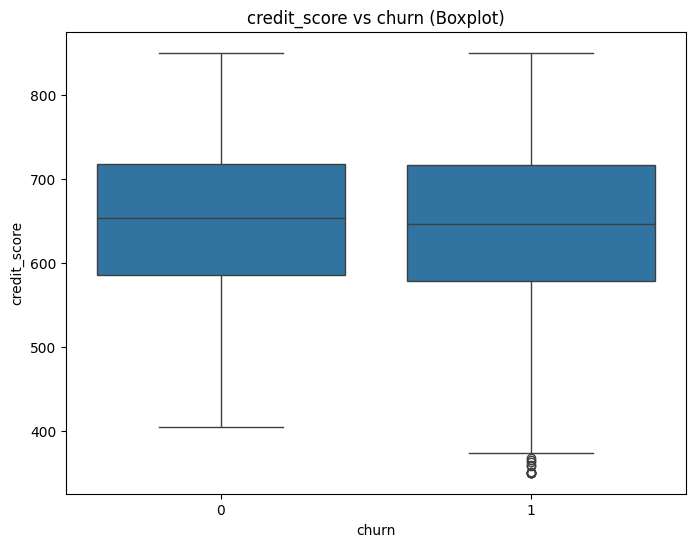

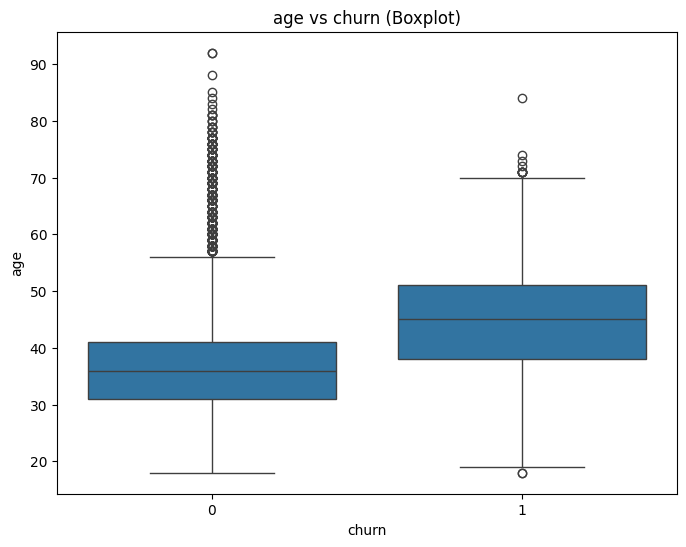

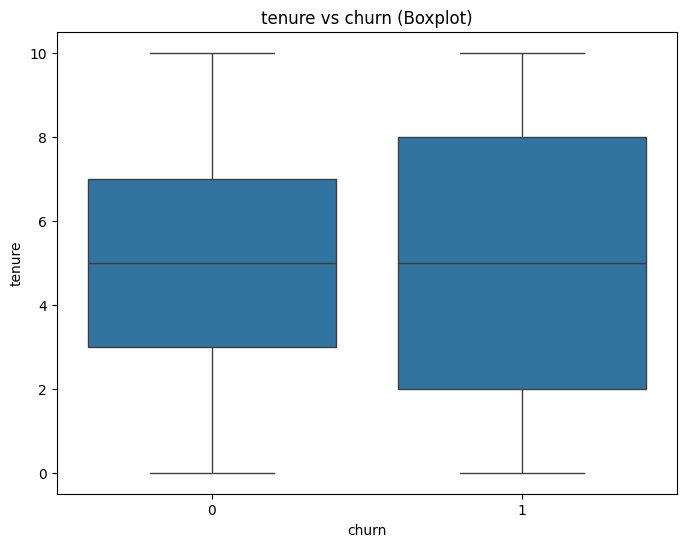

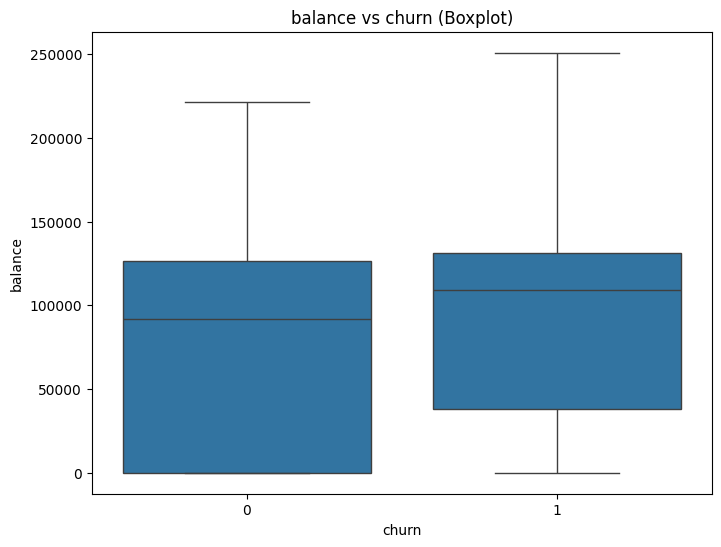

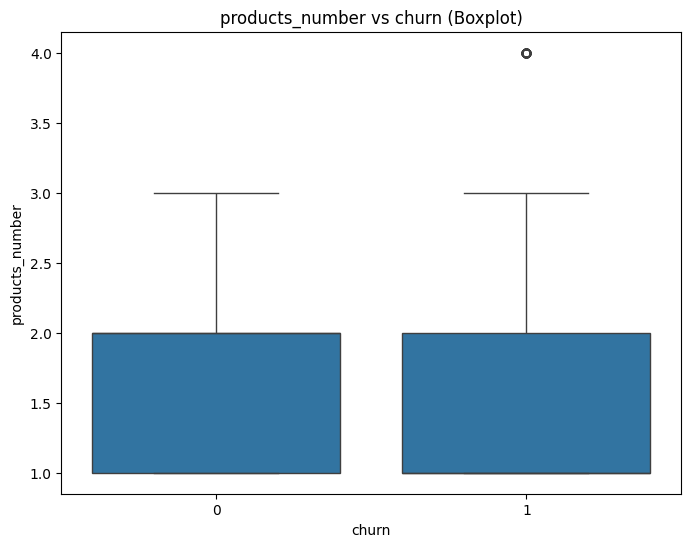

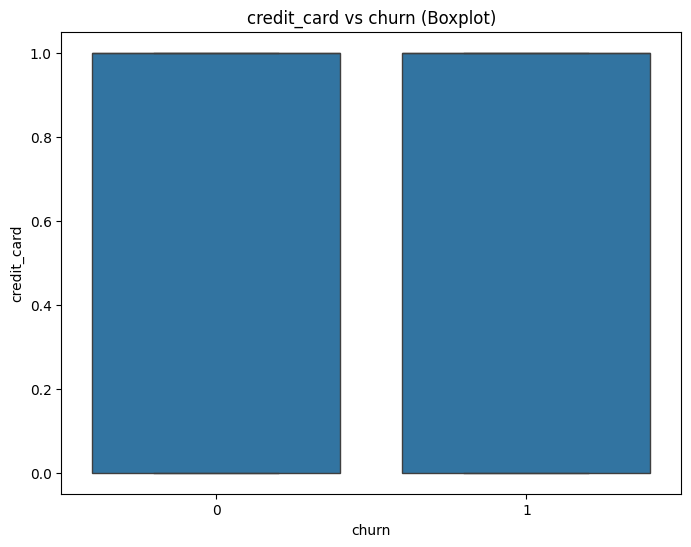

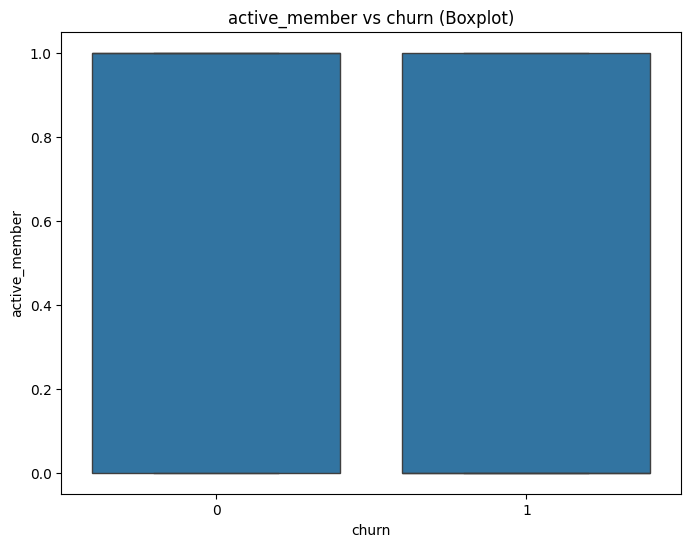

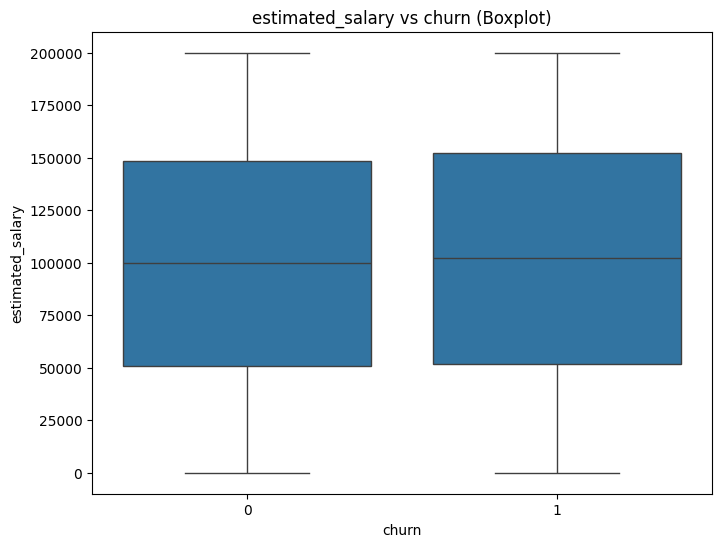

In [ ]:
num_col = raw_data.select_dtypes(include=['int64','float64']).drop(columns=['customer_id','churn']).columns

for i in num_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=raw_data, x='churn', y=i)
    plt.title(f"{i} vs churn (Boxplot)")
    plt.show()

Insight :

Berdasarkan visualisasi boxplot dari berbagai variabel numerik terhadap churn, dapat diketahui bahwa beberapa faktor berpotensi berhubungan dengan perilaku nasabah yang churn. Nasabah dengan usia yang lebih tua (sekitaran 40-an keatas) cenderung memiliki proporsi churn yang lebih tinggi dibandingan yang lebih muda, sehingga program retensi bisa difokuskan pada segmen usia senior dengan menawarkan layanan finansial yang lebih stabil, seperti produk tabungan pensiun, produk jaminan hari tua. Selain itu, nasabah dengan saldo (balance) yang lebih tinggi juga lebih rentan terhadap churn sehingga perusahaan dapat memberikan program loyalitas berbasis saldo atau imbalan eksklusif agar nasabah bernilai tinggi ini tetap bertahan. Sementara variabel lain seperti tenure, product number, credit card, status active member, maupun estimated salary juga terlihat rentan terhadap churn. Dengan demikian, strategi marketing yang tepat adalah melakukan segmentasi pelanggan dan memberikan penawaran retensi yang lebih personal

# Feature Engineering

In [ ]:
df = raw_data.copy()

In [ ]:
feature = df.drop(['churn', 'customer_id'], axis=1)
target = df['churn'] #target

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## One Hot Encoding

In [ ]:
# One Hot Encoding (Train)
from sklearn.preprocessing import OneHotEncoder

encode_OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe = ['country', 'gender']
ohe_train = encode_OHE.fit_transform(feature_train[ohe])

ohe_df = pd.DataFrame(ohe_train,
                      columns=encode_OHE.get_feature_names_out(ohe),
                      index=feature_train.index)

feature_train = pd.concat([feature_train.drop(ohe, axis=1), ohe_df], axis=1)

In [ ]:
# One Hot Encoding (Test)
ohe_test = encode_OHE.transform(feature_test[ohe])

ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=encode_OHE.get_feature_names_out(ohe),
    index=feature_test.index
)

feature_test = pd.concat([feature_test.drop(columns=ohe), ohe_test_df], axis=1)

In [ ]:
feature_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.499250,0.251375,0.249375,0.454750,0.545250
std,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.500031,0.433831,0.432678,0.497979,0.497979
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
feature_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0,0.0,1.0
1561,632,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0,0.0,1.0
1670,559,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0,0.0,1.0
6087,561,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0,1.0,0.0
6669,517,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0,0.0,1.0


## CEK VIF (Untuk Logistic Regression)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant


X = feature_train.astype(float)
X = add_constant(X)


vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,credit_score,1.001748
2,age,1.012787
3,tenure,1.002119
4,balance,1.338085
5,products_number,1.117553
6,credit_card,1.001812
7,active_member,1.011368
8,estimated_salary,1.001525
9,country_France,inf
10,country_Germany,inf


No drop columns!

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [ ]:
# Menerapkan standarisasi ke data pelatihan (train)
feature_train[columns_to_stdscaller] = scaler.fit_transform(feature_train[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
feature_test[columns_to_stdscaller] = scaler.transform(feature_test[columns_to_stdscaller])

# Modelling (Weight = Balanced)

## Define Model

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = 'balanced'
)

In [ ]:
# KNN
knn_clf = KNeighborsClassifier()

In [ ]:
# Decision Tree
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = 'balanced'
)

In [ ]:
# SVM
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = 'balanced'
)

## Fitting Model

In [ ]:
logistic_model.fit(feature_train, target_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
knn_clf.fit(feature_train, target_train)

KNeighborsClassifier()

In [ ]:
dt_clf.fit(feature_train, target_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
svm_clf.fit(feature_train, target_train)

SVC(class_weight='balanced', probability=True, random_state=42)

## Evaluate Model

In [ ]:
def evaluate(model, x_test = feature_test, y_test = target_test, x_train=feature_train, y_train=target_train):
    y_pred_train = model.predict(feature_train)
    print('======= Data Train =======')

    tn, fp, fn, tp = confusion_matrix(target_train, y_pred_train).ravel()
    print('Assuming 1 as yes churn, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(target_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(feature_test)
    print('======= Data Test =======')

    tn, fp, fn, tp = confusion_matrix(target_test, y_pred).ravel()
    print('Assuming 1 as yes churn, we get for Data test:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(target_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [ ]:
#logistic regression
logreg_pred = logistic_model.predict(feature_test.values)

# knn prediction
knn_pred = knn_clf.predict(feature_test.values)

# decision tree prediction
dc_pred = dt_clf.predict(feature_test.values)

# svm rbf prediction
svm_pred = svm_clf.predict(feature_test.values)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
evaluate(logistic_model, x_test = feature_test.values, y_test = target_test, x_train=feature_train.values, y_train=target_train)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 1134
True Negative: 4529
False Positive: 1827
False Negative: 510

Accuracy Data Train: 0.707875
Precision Data Train: 0.3829787234042553
Recall Data Train: 0.6897810218978102
F1-Score Data Train: 0.4925081433224756
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 280
True Negative: 1159
False Positive: 448
False Negative: 113

Accuracy Data Test: 0.7195
Precision Data Test: 0.38461538461538464
Recall Data Test: 0.712468193384224
F1-Score Data Test: 0.49955396966993754


In [ ]:
evaluate(knn_clf, x_test = feature_test.values, y_test = target_test, x_train=feature_train.values, y_train=target_train)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 893
True Negative: 6136
False Positive: 220
False Negative: 751

Accuracy Data Train: 0.878625
Precision Data Train: 0.8023360287511231
Recall Data Train: 0.5431873479318735
F1-Score Data Train: 0.6478055857816467
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 177
True Negative: 1506
False Positive: 101
False Negative: 216

Accuracy Data Test: 0.8415
Precision Data Test: 0.6366906474820144
Recall Data Test: 0.45038167938931295
F1-Score Data Test: 0.5275707898658718


In [ ]:
evaluate(dt_clf, x_test = feature_test.values, y_test = target_test, x_train=feature_train.values, y_train=target_train)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 1644
True Negative: 6356
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 191
True Negative: 1408
False Positive: 199
False Negative: 202

Accuracy Data Test: 0.7995
Precision Data Test: 0.4897435897435897
Recall Data Test: 0.4860050890585242
F1-Score Data Test: 0.4878671775223499


In [ ]:
evaluate(svm_clf, x_test = feature_test.values, y_test = target_test, x_train=feature_train.values, y_train=target_train)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 1315
True Negative: 5233
False Positive: 1123
False Negative: 329

Accuracy Data Train: 0.8185
Precision Data Train: 0.5393765381460214
Recall Data Train: 0.7998783454987834
F1-Score Data Train: 0.6442920137187654
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 303
True Negative: 1280
False Positive: 327
False Negative: 90

Accuracy Data Test: 0.7915
Precision Data Test: 0.48095238095238096
Recall Data Test: 0.7709923664122137
F1-Score Data Test: 0.592375366568915


Interpretasi :

Diantara model diatas, lebih seimbang adalah SVM. Dapat dilihat dari recall tinggi dan lebih stabil dibandingkan model lain, gap antara train dan test juga beda tipis. Meskipun precision hanya 48%, model ini dapat mengenali nasabah yang benar-benar churn. Cocok untuk strategi deteksi churn lebih luas dengan resiko false positive.

# Modelling (WITH SMOTEENN)

## Define Model

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(feature_train, target_train)

In [ ]:
logistic_model_smoten = LogisticRegression(
    random_state = 42,
    max_iter=1000,
)

In [ ]:
knn_clf_smoten = KNeighborsClassifier()

In [ ]:
dt_clf_smoten = DecisionTreeClassifier(
    random_state = 42,
)

In [ ]:
svm_clf_smoten = SVC(
    random_state = 42,
    probability=True,
)

## Fitting Model

In [ ]:
logistic_model_smoten.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
knn_clf_smoten.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [ ]:
dt_clf_smoten.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
svm_clf_smoten.fit(X_resampled, y_resampled)

SVC(probability=True, random_state=42)

## Evaluate Model

In [ ]:
def evaluate(model, x_test = feature_test, y_test = target_test, x_train=X_resampled, y_train=y_resampled):
    y_pred_train = model.predict(X_resampled)
    print('======= Data Train =======')

    tn, fp, fn, tp = confusion_matrix(y_resampled, y_pred_train).ravel()
    print('Assuming 1 as yes churn, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_resampled, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(feature_test)
    print('======= Data Test =======')

    tn, fp, fn, tp = confusion_matrix(target_test, y_pred).ravel()
    print('Assuming 1 as yes churn, we get for Data test:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(target_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [ ]:
#logistic regression
logreg_pred = logistic_model_smoten.predict(feature_test.values)

# knn prediction
knn_pred = knn_clf_smoten.predict(feature_test.values)

# decision tree prediction
dc_pred = dt_clf_smoten.predict(feature_test.values)

# svm rbf prediction
svm_pred = svm_clf_smoten.predict(feature_test.values)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
evaluate(logistic_model_smoten, x_test = feature_test.values, y_test = target_test, x_train=X_resampled.values, y_train=y_resampled)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 4631
True Negative: 3136
False Positive: 1076
False Negative: 925

Accuracy Data Train: 0.7951474201474201
Precision Data Train: 0.8114596110040302
Recall Data Train: 0.8335133189344852
F1-Score Data Train: 0.8223386309153867
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 305
True Negative: 1024
False Positive: 583
False Negative: 88

Accuracy Data Test: 0.6645
Precision Data Test: 0.34346846846846846
Recall Data Test: 0.7760814249363868
F1-Score Data Test: 0.4761904761904762


In [ ]:
evaluate(knn_clf_smoten, x_test = feature_test.values, y_test = target_test, x_train=X_resampled.values, y_train=y_resampled)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 5534
True Negative: 4098
False Positive: 114
False Negative: 22

Accuracy Data Train: 0.9860769860769861
Precision Data Train: 0.9798158640226629
Recall Data Train: 0.996040316774658
F1-Score Data Train: 0.9878614780435558
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 310
True Negative: 1140
False Positive: 467
False Negative: 83

Accuracy Data Test: 0.725
Precision Data Test: 0.398970398970399
Recall Data Test: 0.7888040712468194
F1-Score Data Test: 0.5299145299145299


In [ ]:
evaluate(dt_clf_smoten, x_test = feature_test.values, y_test = target_test, x_train=X_resampled.values, y_train=y_resampled)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 5556
True Negative: 4212
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 277
True Negative: 1234
False Positive: 373
False Negative: 116

Accuracy Data Test: 0.7555
Precision Data Test: 0.42615384615384616
Recall Data Test: 0.7048346055979644
F1-Score Data Test: 0.5311601150527325


In [ ]:
evaluate(svm_clf_smoten, x_test = feature_test.values, y_test = target_test, x_train=X_resampled.values, y_train=y_resampled)

======= Data Train =======
Assuming 1 as yes churn, we get for Data Train:

True Positive: 5202
True Negative: 3850
False Positive: 362
False Negative: 354

Accuracy Data Train: 0.9266994266994267
Precision Data Train: 0.9349388928828181
Recall Data Train: 0.9362850971922246
F1-Score Data Train: 0.9356115107913668
======= Data Test =======
Assuming 1 as yes churn, we get for Data test:

True Positive: 318
True Negative: 1173
False Positive: 434
False Negative: 75

Accuracy Data Test: 0.7455
Precision Data Test: 0.4228723404255319
Recall Data Test: 0.8091603053435115
F1-Score Data Test: 0.5554585152838427


Insight :

Diantara model diatas, Logistic Regression dengan SMOTEENN lebih baik dalam mengenali churn (recall tinggi), tapi dengan trade off false positive sangat banyak. Sehingga model ini sangat boros pada biaya marketing karena banyak pelanggan loyal salah sasaran. Disamping itu, sebenanrya recall SVM lebih baik daripada logistic namun model SVM terindikasi overfitting karena gap antara train dan test sangat jauh.

## Churn Analysis

Melalui berbagai pertimbangan, maka model yang akan digunakan pada Churn Analysis adalah SVM (weight=balanced). Hal ini dikarenakan dari sisi recall yang tinggi, modelnya cukup stabil dan tidak terlalu overfitting seperti model lain.

In [ ]:
from sklearn.metrics import confusion_matrix
def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [ ]:
value_prediction(target_test, svm_clf.predict(feature_test))

TN : 1280
TP : 303
FN : 90
FP : 327


In [ ]:
def get_value(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    return tn, fp, fn, tp

In [ ]:
tn, fp, fn, tp = get_value(target_test, svm_clf.predict(feature_test))
class_1 = tp + fp
print('Prediksi AI-ML kelas 1 (churn) :', class_1)
class_0 = tn + fn
print('Prediksi AI-ML kelas 0 (No churn) :', class_0)

Prediksi AI-ML kelas 1 (churn) : 630
Prediksi AI-ML kelas 0 (No churn) : 1370


In [ ]:
# sama kaya data diatas
y_pred = pd.DataFrame(svm_clf.predict(feature_test))
y_pred.value_counts()

,count
0,
0,1370
1,630


In [ ]:
print(f"Total data pada X_test: {1370 + 630} orang")

Total data pada X_test: 2000 orang


### Menghitung Potensi Benar dan Salah

Asumsi:
1. Apabila perusahaan berhasil menahan seorang nasabah agar tidak melakukan churn, maka akan ada tambahan keuntungan bersih sebesar 500 dolar dari nasabah tersebut. Untuk mencapai hal ini, perusahaan berencana melakukan langkah marketing preventif, misalnya memberikan penawaran khusus bagi nasabah baru, menyelenggarakan loyalty program untuk pemegang kartu kredit, atau mengadakan program retensi secara personal melalui email, panggilan telepon, maupun iklan digital yang ditargetkan. Setiap upaya retensi ini membutuhkan biaya sebesar 50 dolar per nasabah. Perhitungan ini tidak memasukkan biaya operasional lainnya dan diasumsikan perusahaan memiliki anggaran memadai untuk menjalankan strategi retensi tersebut. Hasil prediksi churn (1) dari model akan digunakan untuk menentukan nasabah mana yang akan dijadikan sasaran intervensi marketing agar tidak berpindah ke layanan lain.

2. Prediksi Benar
- True Positive (TP) – 303 nasabah: Model memprediksi churn (1) dan kenyataannya nasabah memang berisiko churn. Artinya, intervensi marketing yang dilakukan berhasil menahan mereka agar tetap bertahan, sehingga keuntungan yang diperoleh dapat dihitung sebagai profit perusahaan.

- True Negative (TN) – 1280 nasabah: Model memprediksi tidak churn (0) dan faktanya nasabah memang tidak churn. Dalam hal ini, model tepat mengenali nasabah yang tidak perlu tindakan retensi, sehingga tidak ada biaya tambahan dan tidak masuk dalam perhitungan profit.

3. Prediksi Salah
- False Positive (FP) – 327 nasabah: Model memprediksi churn (1) namun kenyataannya nasabah tidak churn. Mereka tetap menerima program retensi, sehingga perusahaan mengeluarkan biaya marketing yang sebenarnya tidak diperlukan. Meski demikian, nasabah tetap bertahan, sehingga hasil ini tetap diperhitungkan dalam estimasi profit dengan mempertimbangkan biaya yang dikeluarkan.

- False Negative (FN) – 90 nasabah: Model memprediksi tidak churn (0) padahal kenyataannya nasabah benar-benar churn. Dalam kondisi ini, perusahaan gagal melakukan pencegahan sehingga kehilangan potensi keuntungan dari nasabah yang pergi. Dampak ini termasuk dalam perhitungan kerugian profit.

4. Kesimpulan
- Keuntungan dari TP
- Kerugian dari FN
- FP : keuntungan - biaya marketing

In [ ]:
print(f'Keuntungan : {(tp * 500) + (fp * 500) - (fp * 50)} $')
print(f'Kerugian : {fn * 500} $')
print(f'Potensi keuntungan = {(tp * 500) + (fp * 500) - (fp * 50) - (fn * 500)} $')

Keuntungan : 298650 $
Kerugian : 45000 $
Potensi keuntungan = 253650 $
